## 3.8.목 안간 날
p167~190

###### is_unique,reindex,fill,select,sort,rank
###### apply

In [6]:
!start .

[ 데이터 ]
7.5	3.6	3.5	3.3	1.5
7.4	3.2	3	2.8	1.2
6.6	2.9	2	2	1.1
7.7	3	2.2	2.2	1
7.9	3.1	2.3	2.3	1.2
7.7	3.3	2.6	2.5	1.3
7.7	3	2.3	2.2	1.4
7.1	3.2	2	2.1	1.4
7	3.1	2.1	2	1.2
7.9	3.6	2.5	2.5	1.6
7.8	3.5	2.5	2.4	3
7.4	3.4	2.1	2.1	2.7
7.5	3	2.1	2.1	2.5
7.9	3	2	1.9	1.9

[ 문제 ]
1. 다음의 데이터를 읽어들여 다음과 같은 프레임 형태로 변경
	20대	30대	40대	50대	60세이상

In [35]:
# 2000년	7.5	3.6	3.5	3.3	1.5
# 2001년	7.4	3.2	3	2.8	1.2
# 2002년	6.6	2.9	2	2	1.1
#  ...
# 2011년	7.4	3.4	2.1	2.1	2.7
# 2012년	7.5	3	2.1	2.1	2.5
# 2013년	7.9	3	2	1.9	1.9

1. 
2. 2010년부터의 20~40대 실업률만 추출하여 새로운 데이터프레임을 만들어라 
3. 전체 데이터에서 각 년도별 20대와 30대의 실업률 차이를 구하라(20대 - 30대)
4. 모든 실업률 지수를 소수점 둘째 짜리로 표현하여라
5. 연령별 실업률의 평균과 연도별 실업률 평균을 각각 구하여라(np.average)
6. 전체 데이터에서 20대 실업률이 7이하인 연도만 출력하여라. 
7. 각 년도 별 총 실업률에서 20대 실업률이 차지하고 있는 비율을 출력하여라.(함수생성)

#### 1

In [7]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [24]:
df= pd.read_table("data/ex_180308.txt", header= None); df

,0,1,2,3,4
0,7.5,3.6,3.5,3.3,1.5
1,7.4,3.2,3.0,2.8,1.2
2,6.6,2.9,2.0,2.0,1.1
3,7.7,3.0,2.2,2.2,1.0
4,7.9,3.1,2.3,2.3,1.2
5,7.7,3.3,2.6,2.5,1.3
6,7.7,3.0,2.3,2.2,1.4
7,7.1,3.2,2.0,2.1,1.4
8,7.0,3.1,2.1,2.0,1.2
9,7.9,3.6,2.5,2.5,1.6


In [38]:
cols= ['%d대'%(10*i) for i in range(2,6,1)]
cols.append('60대이상')
indexes= ['%d년'%i for i in range(2000,2014,1)]
df.columns= cols
df.index= indexes
df

,20대,30대,40대,50대,60대이상
2000년,7.5,3.6,3.5,3.3,1.5
2001년,7.4,3.2,3.0,2.8,1.2
2002년,6.6,2.9,2.0,2.0,1.1
2003년,7.7,3.0,2.2,2.2,1.0
2004년,7.9,3.1,2.3,2.3,1.2
2005년,7.7,3.3,2.6,2.5,1.3
2006년,7.7,3.0,2.3,2.2,1.4
2007년,7.1,3.2,2.0,2.1,1.4
2008년,7.0,3.1,2.1,2.0,1.2
2009년,7.9,3.6,2.5,2.5,1.6


#### lambda 예시
lambda 인자: 반환표현식

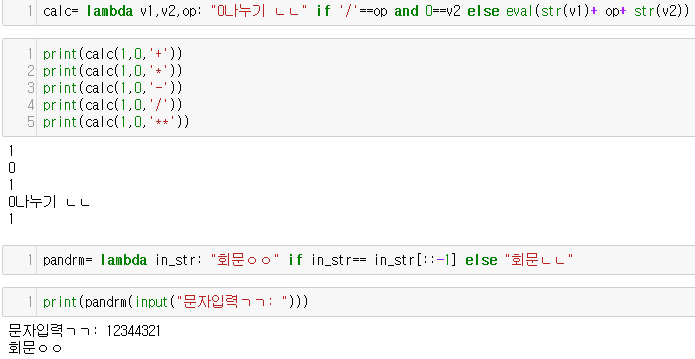

##### applymap
DataFrame. 2차원 이상. ex. 실수값을 문자열포맷으로 변환
###### 기존 map
1차원 list만 가능했었다